In [70]:
from pymongo import MongoClient
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [71]:


try:
    import config
    print('using local config file')
    mongodb_uri = config.mongodb_uri
except:
    print('using environment variable')
    mongodb_uri = os.getenv('MONGODB_URI')

using local config file


Analyzing Test Data
raw
                          90dayTreasury  portfolio       spy       tlt
timestamp                                                            
2016-09-15 13:30:08.905            1.0   1.000010  1.000017  0.999972
2016-09-15 13:31:08.905            1.0   0.999989  1.000010  0.999981
2016-09-15 13:32:08.905            1.0   0.999979  0.999981  0.999978
2016-09-15 13:33:08.905            1.0   1.000021  0.999999  1.000022
2016-09-15 13:34:08.905            1.0   1.000032  1.000033  1.000014
2016-09-15 13:35:08.905            1.0   1.000000  1.000044  0.999991
2016-09-15 13:36:08.905            1.0   1.000012  1.000011  1.000013
2016-09-15 13:37:08.905            1.0   0.999997  0.999997  0.999997
2016-09-15 13:38:08.905            1.0   0.999988  1.000020  0.999982
2016-09-15 13:39:08.905            1.0   1.000011  1.000013  0.999985
2016-09-15 13:40:08.905            1.0   1.000023  1.000006  1.000025
2016-09-15 13:41:08.905            1.0   0.999994  1.000014  0.99

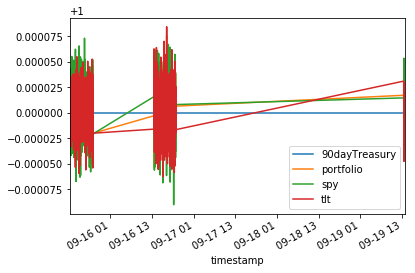

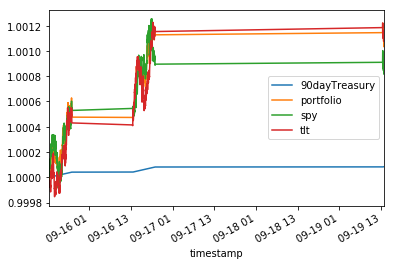

In [72]:
print("Analyzing Test Data")
success = True

if success:
    try:
        client = MongoClient(mongodb_uri)
        db = client.get_database()
    except Exception as e:
        print('mongo login error ', str(e))
        success = False
if success:
    try:
        dataCursor = db.percentageMoveTest.find(projection={'_id': False},sort=[("timestamp", 1)])
    except Exception as e:
        print('mongo data cursor error ', str(e))
        success = False
        
if success:
    try:
        df =  pd.DataFrame(list(dataCursor)).set_index(['timestamp'])
    except Exception as e:
        print('mongo data cursor error ', str(e))
        success = False        
        
if success:
    plt.figure()
    df+=1
    print('raw\n',df)
    df.plot()
    plt.figure()
    cumulative = df.cumprod(axis=0)
    print('cum\n',cumulative)
    cumulative.plot()